In [97]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer



In [98]:

df = pd.read_csv('Womens Clothing E-Commerce Reviews.csv')
df.shape

(23486, 11)

In [99]:


df.head()



,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [100]:
df.isnull().sum()

,0
Unnamed: 0,0
Clothing ID,0
Age,0
Title,3810
Review Text,845
Rating,0
Recommended IND,0
Positive Feedback Count,0
Division Name,14
Department Name,14


In [101]:
df = df.drop('Unnamed: 0', axis=1)

In [102]:
df.head()


,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [103]:
df['Title'] = df['Title'].fillna('No Title')
df['Review Text'] = df['Review Text'].fillna('No Review')

In [104]:
df = df.dropna(subset=['Division Name', 'Department Name', 'Class Name'])


In [105]:
df.isnull().sum()

,0
Clothing ID,0
Age,0
Title,0
Review Text,0
Rating,0
Recommended IND,0
Positive Feedback Count,0
Division Name,0
Department Name,0
Class Name,0


In [106]:
df['Review_Length'] = df['Review Text'].str.len()
df.head()

<ipython-input-106-21d7c2ab6166>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Review_Length'] = df['Review Text'].str.len()


,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,Review_Length
0,767,33,No Title,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates,53
1,1080,34,No Title,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses,303
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,500
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,124
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,192


In [107]:
df.dtypes

,0
Clothing ID,int64
Age,int64
Title,object
Review Text,object
Rating,int64
Recommended IND,int64
Positive Feedback Count,int64
Division Name,object
Department Name,object
Class Name,object


In [108]:
## analysing rating coulumn
print(df['Rating'].value_counts(normalize=True).sort_index() * 100)

Rating
1     3.587253
2     6.667519
3    12.231595
4    21.630027
5    55.883606
Name: proportion, dtype: float64


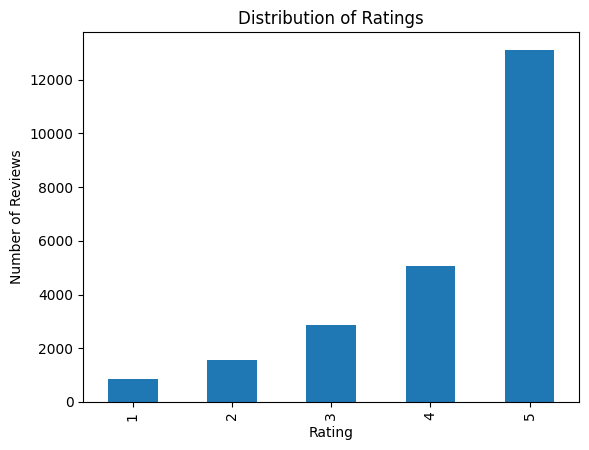

In [109]:
import matplotlib.pyplot as plt

df['Rating'].value_counts().sort_index().plot(kind='bar')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Number of Reviews')
plt.show()


In [110]:
## analysing recommended coulumn
print(df['Recommended IND'].value_counts(normalize=True).sort_index() * 100)

Recommended IND
0    17.774369
1    82.225631
Name: proportion, dtype: float64


In [111]:
pd.crosstab(df['Rating'], df['Recommended IND'], normalize='index') * 100


Recommended IND,0,1
Rating,,
1,98.099762,1.900238
2,93.993610,6.006390
3,58.585859,41.414141
4,3.309041,96.690959
5,0.190592,99.809408


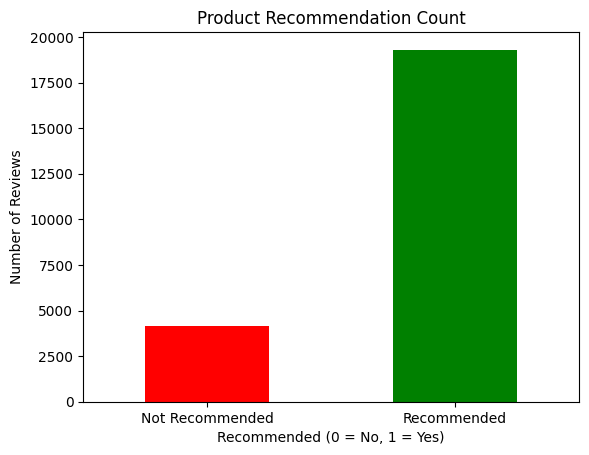

In [112]:
import matplotlib.pyplot as plt

# Bar plot of recommendation counts
df['Recommended IND'].value_counts().sort_index().plot(kind='bar', color=['red', 'green'])
plt.title('Product Recommendation Count')
plt.xlabel('Recommended (0 = No, 1 = Yes)')
plt.ylabel('Number of Reviews')
plt.xticks([0, 1], ['Not Recommended', 'Recommended'], rotation=0)
plt.show()


In [113]:
# analysing avg positive feedback per clothing id
feedback_percent = df.groupby('Clothing ID')['Positive Feedback Count'].mean()
print(feedback_percent.sort_values(ascending=False))

Clothing ID
94     32.0
723    16.0
559    14.0
271    13.0
91     12.0
       ... 
470     0.0
734     0.0
732     0.0
728     0.0
922     0.0
Name: Positive Feedback Count, Length: 1199, dtype: float64


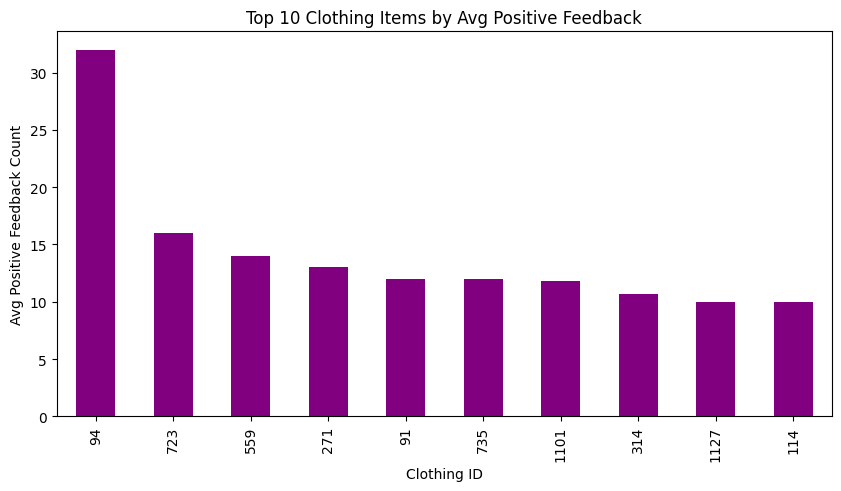

In [114]:
top_feedback = feedback_percent.sort_values(ascending=False).head(10)

top_feedback.plot(kind='bar', figsize=(10, 5), color='purple')
plt.title('Top 10 Clothing Items by Avg Positive Feedback')
plt.xlabel('Clothing ID')
plt.ylabel('Avg Positive Feedback Count')
plt.show()


In [115]:
#avg rating per clothing id
avg_rating = df.groupby('Clothing ID')['Rating'].mean().sort_values(ascending=False)
print(avg_rating)


Clothing ID
6       5.0
1205    5.0
0       5.0
1197    5.0
1196    5.0
       ... 
814     1.0
812     1.0
369     1.0
371     1.0
18      1.0
Name: Rating, Length: 1199, dtype: float64


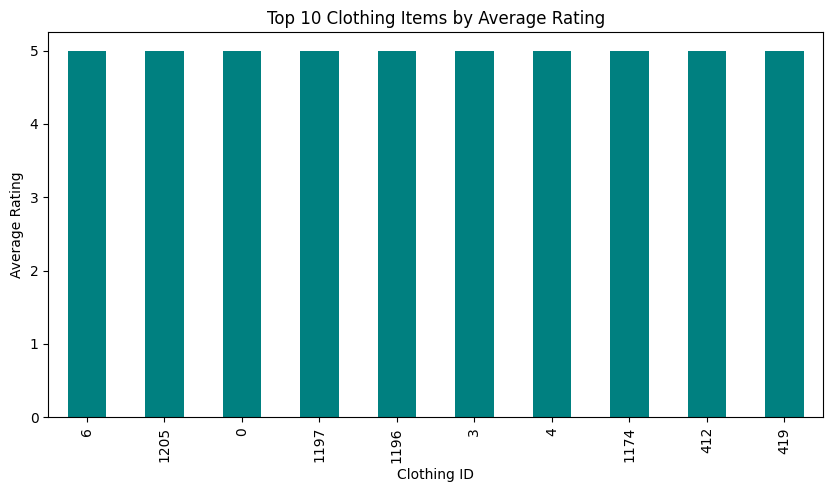

In [116]:
top_avg_rating = avg_rating.head(10)

top_avg_rating.plot(kind='bar', figsize=(10, 5), color='teal')
plt.title('Top 10 Clothing Items by Average Rating')
plt.xlabel('Clothing ID')
plt.ylabel('Average Rating')
plt.show()


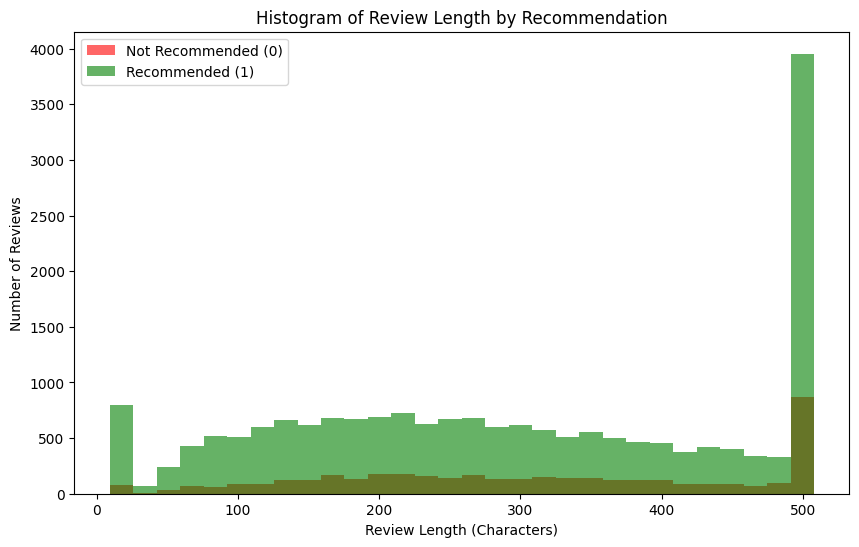

In [117]:
import matplotlib.pyplot as plt

# Filter data
rec_0 = df[df['Recommended IND'] == 0]['Review_Length']
rec_1 = df[df['Recommended IND'] == 1]['Review_Length']

# Plot
plt.figure(figsize=(10, 6))
plt.hist(rec_0, bins=30, alpha=0.6, label='Not Recommended (0)', color='red')
plt.hist(rec_1, bins=30, alpha=0.6, label='Recommended (1)', color='green')
plt.title('Histogram of Review Length by Recommendation')
plt.xlabel('Review Length (Characters)')
plt.ylabel('Number of Reviews')
plt.legend()
plt.show()



In [118]:


# Low rated reviews (1 or 2 stars)
low_rated_reviews = df[df['Rating'] <= 3]['Review Text']

# High rated reviews (4 or 5 stars)
high_rated_reviews = df[df['Rating'] >= 4]['Review Text']



In [119]:
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def generate_wordcloud(text_data, title):
    vectorizer = CountVectorizer(stop_words='english')
    X = vectorizer.fit_transform(text_data)
    words = vectorizer.get_feature_names_out()
    counts = X.toarray().sum(axis=0)
    word_freq = dict(zip(words, counts))

    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()



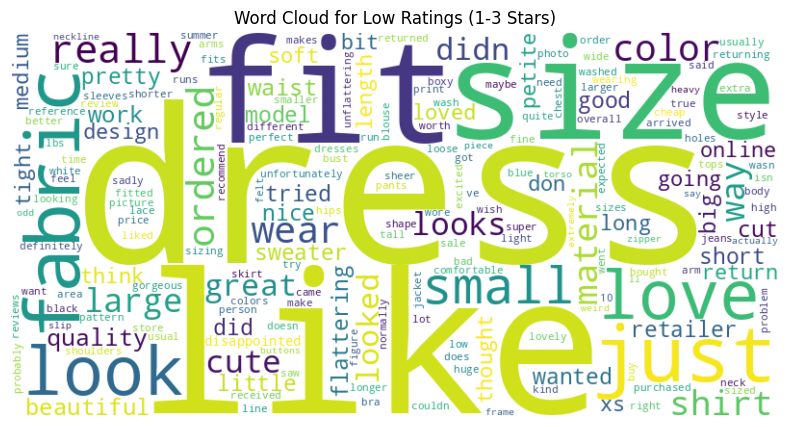

In [120]:
generate_wordcloud(low_rated_reviews, 'Word Cloud for Low Ratings (1-3 Stars)')



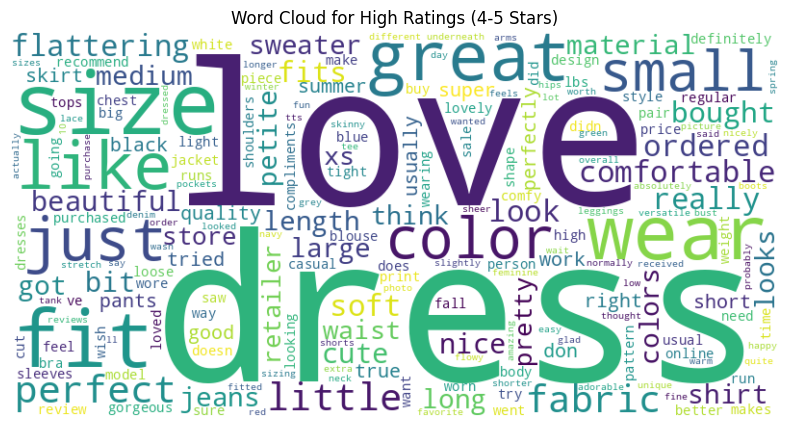

In [121]:
generate_wordcloud(high_rated_reviews, 'Word Cloud for High Ratings (4-5 Stars)')

In [122]:
# Define sentiment based on Rating
def get_sentiment(rating):
    if rating >= 4:
        return 'positive'
    elif rating == 3:
        return 'neutral'
    else:
        return 'negative'

df['Sentiment'] = df['Rating'].apply(get_sentiment)


In [123]:
import re

def clean_text(text):
    text = re.sub(r'[^\w\s]', '', text)  # remove punctuation
    text = text.lower()                  # lowercase
    text = re.sub(r'\d+', '', text)      # remove numbers
    return text

df['Cleaned_Review'] = df['Review Text'].fillna('').apply(clean_text)


In [124]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


In [125]:
# Create sentiment labels
df['Sentiment'] = df['Rating'].apply(lambda x: 'positive' if x >= 4 else 'negative' if x <= 2 else 'neutral')

# Clean review text
df['Cleaned_Review'] = df['Review Text'].fillna('').str.lower().str.replace(r'[^\w\s]', '', regex=True)


In [142]:
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')

from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

# Apply lemmatization on cleaned review text
df['Lemmatized_Review'] = df['Cleaned_Review'].apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in x.split()]))


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [143]:
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X = vectorizer.fit_transform(df['Lemmatized_Review'])
y = df['Sentiment']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [144]:
models = {
    'Logistic Regression': LogisticRegression(),
    'Naive Bayes': MultinomialNB(),
    'SVM': LinearSVC(),
    'Random Forest': RandomForestClassifier(),
    'KNN': KNeighborsClassifier()
}


In [145]:
result1 = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    acc = accuracy_score(y_test, preds)
    result1[name] = acc
    print(f"{name}: {acc:.4f}")

Logistic Regression: 0.9282
Naive Bayes: 0.8955
SVM: 0.9299
Random Forest: 0.9078
KNN: 0.9055


In [148]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)


In [149]:
models = {
    'Logistic Regression': LogisticRegression(),
    'Naive Bayes': MultinomialNB(),
    'SVM': LinearSVC(),
    'Random Forest': RandomForestClassifier(),
    'KNN': KNeighborsClassifier()
}


In [150]:
result3 = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    acc = accuracy_score(y_test, preds)
    result3[name] = acc
    print(f"{name}: {acc:.4f}")

Logistic Regression: 0.9391
Naive Bayes: 0.9246
SVM: 0.9517
Random Forest: 0.9622
KNN: 0.5390


In [137]:
print(df['Sentiment'].value_counts())


Sentiment
positive    18194
neutral      2871
negative     2407
Name: count, dtype: int64


In [154]:
def clean_and_lemmatize(text):
    text = re.sub(r'[^\w\s]', '', text.lower())
    text = re.sub(r'\d+', '', text)
    words = text.split()
    lemmatized = [lemmatizer.lemmatize(word) for word in words]
    return ' '.join(lemmatized)

In [156]:
# Your sample input
sample = ["The fit and fabric were good. Very happy."]

# Clean & transform
sample_cleaned = [clean_and_lemmatize(review) for review in sample]
sample_vectorized = vectorizer.transform(sample_cleaned)

# Predict using trained Logistic Regression model
prediction = model.predict(sample_vectorized)
print(f"Predicted Sentiment: {prediction[0]}")

Predicted Sentiment: positive
